In [22]:
import numpy as np

def pca(X, k_components=2):
    # Calculate the empirical covariance matrix
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    covariance_matrix = np.cov(X_centered.T)    
    # Do SVD decomposition of Σ   
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) 
    # Pick the top-K eigenvectors
    indices = np.argsort(eigenvalues)[::-1]
    projection_matrix = eigenvectors[:, indices[:k_components]]
    # Create the new representation
    new_representation = np.dot( X_centered,projection_matrix)
    return new_representation

In [23]:
def kmeans(X, K=3, num_iterations=100):
    centers = X[np.random.choice(X.shape[0], K, replace=False)]
    for i in range(num_iterations):
        # calculate the distances
        distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
        # assign each data point to the nearest cluster
        labels = distances.argmin(axis=0)
        # update the cluster centers
        for k in range(K):
            centers[k] = X[labels == k].mean(axis=0)
    return labels + 1

In [24]:
def silhouette_coefficient(X, labels):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distances[i, j] = np.linalg.norm(X[i] - X[j])
    
    s = np.zeros(n_samples)
    for i in range(n_samples):
        a_i = np.mean(distances[i, labels == labels[i]])
        b_i = np.min([np.mean(distances[i, labels != k]) for k in np.unique(labels) if k != labels[i]])
        s[i] = (b_i - a_i) / max(a_i, b_i)
        
    return np.mean(s)

In [25]:
def rand_index(labels_true, labels_pred):
    print(labels_pred[:, np.newaxis])
    print(labels_pred)
    # print(labels_true[:, np.newaxis])
    
    a = ((labels_pred[:, np.newaxis] == labels_pred) & (labels_true[:, np.newaxis] == labels_true)).sum()
    b = ((labels_pred[:, np.newaxis] != labels_pred) & (labels_true[:, np.newaxis] != labels_true)).sum()
    c = ((labels_pred[:, np.newaxis] == labels_pred) & (labels_true[:, np.newaxis] != labels_true)).sum()
    d = ((labels_pred[:, np.newaxis] != labels_pred) & (labels_true[:, np.newaxis] == labels_true)).sum()
    ri = (a + b) / (a + b + c + d)
    return ri

In [26]:
import matplotlib.pyplot as plt
# Load the dataset
data = np.loadtxt('seeds_dataset.txt')
true_labels = data[:, -1]
# PCA
X_pca = pca(data)
# K-means
clusters = kmeans(X_pca)

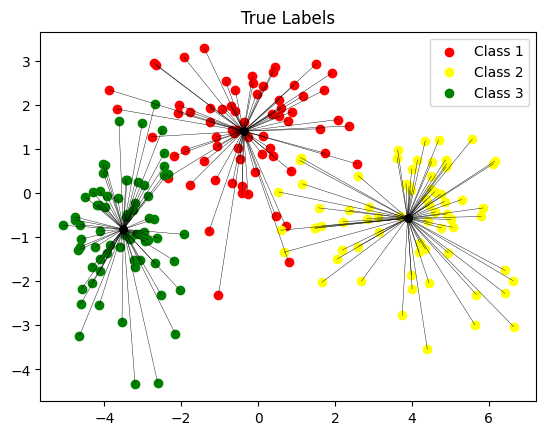

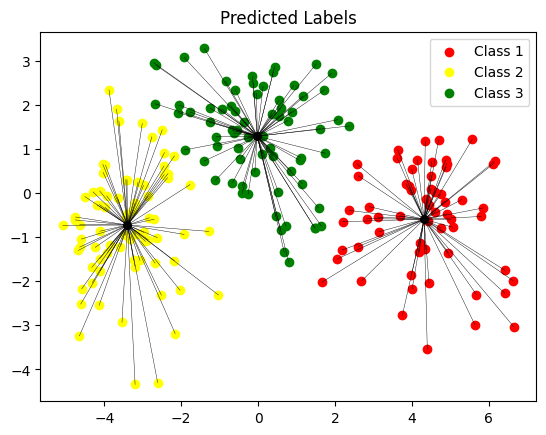

In [27]:
#plot the true labels and predicted labels
colors = ['red','yellow','green']

for i in range(1,4):
    plt.scatter(X_pca[true_labels == i, 0], X_pca[true_labels == i, 1], 
                c=colors[i-1], label='Class {}'.format(i))
    center = np.mean(X_pca[true_labels == i, :], axis=0)
    plt.scatter(center[0], center[1], c='black', s=30)
    for j in range(len(X_pca[true_labels == i])):
        plt.plot([X_pca[true_labels == i][j][0], center[0]], 
                [X_pca[true_labels == i][j][1], center[1]], c='black', linewidth=0.3)
plt.legend()
plt.title("True Labels")
plt.show()

for i in range(1,4):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                c=colors[i-1], label='Class {}'.format(i))
    center = np.mean(X_pca[clusters == i, :], axis=0)
    plt.scatter(center[0], center[1], c='black', s=30)
    for j in range(len(X_pca[clusters == i])):
        plt.plot([X_pca[clusters == i][j][0], center[0]], 
                [X_pca[clusters == i][j][1], center[1]], c='black', linewidth=0.3)
plt.legend()
plt.title("Predicted Labels")
plt.show()

In [28]:
# Evaluate the performance of the clustering
sc = silhouette_coefficient(X_pca, clusters)
ri = rand_index(true_labels, clusters)

print(f'Silhouette Coefficient: {sc:.4f}')
print(f'Rand Index: {ri:.4f}')

[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [2]
 [3]
 [3]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
